In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

E:\installation\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#read file
df=pd.read_csv("E:/excelr/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#convert state into numeric 
df1=pd.get_dummies(df["State"])
#drop column
df=df.drop('State',axis=1)
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [6]:
#concat df and df1
df=pd.concat([df,df1],axis=1)
df

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


# correlation matrix

In [7]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


# Scatterplot between variables along with histograms

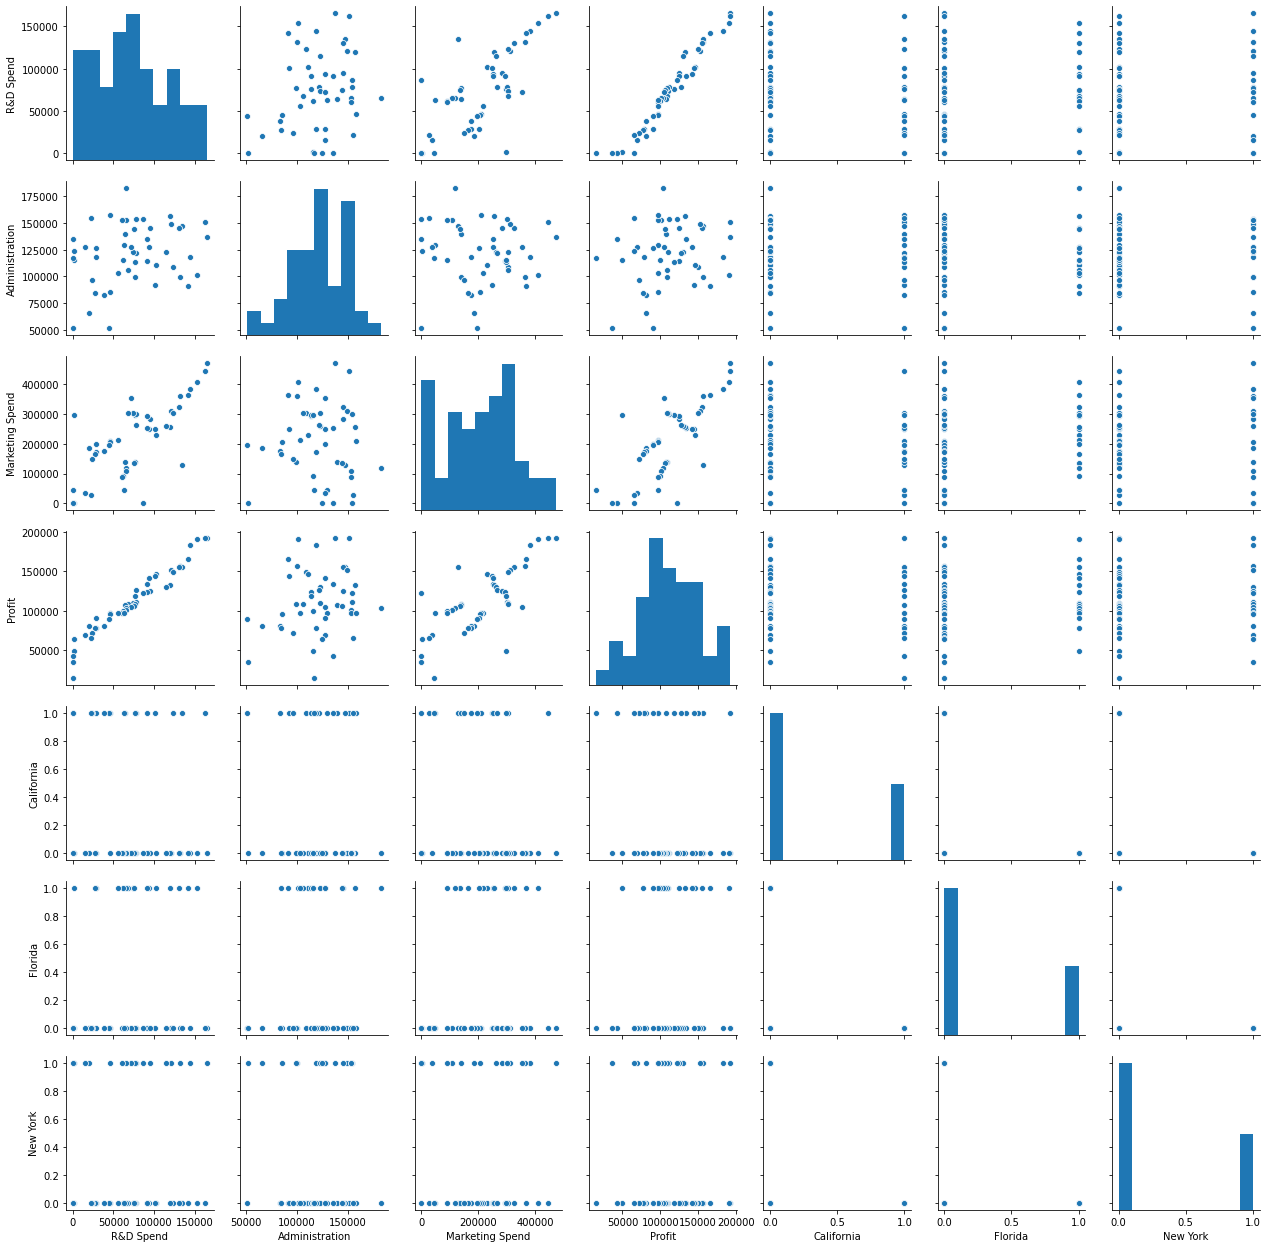

In [8]:
#Format the plot background and scatter plots for all the variables
import seaborn as sns
sns.pairplot(df)

In [9]:
#rename columns
df.rename(columns={"R&D Spend":'rd',"Marketing Spend":'marketing',"New York":'newyork'},inplace=True)
df.head(2)

,rd,Administration,marketing,Profit,California,Florida,newyork
0,165349.2,136897.80,471784.10,192261.83,0,0,1
1,162597.7,151377.59,443898.53,191792.06,1,0,0


# Preparing a model

In [10]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~rd+Administration+marketing+California+Florida+newyork',data=df).fit()

In [11]:
#Coefficients
model.params

Intercept         37633.233317
rd                    0.806023
Administration       -0.027004
marketing             0.026980
California        12492.110514
Florida           12690.899307
newyork           12450.223495
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues )

Intercept          7.417409
rd                17.368580
Administration    -0.517012
marketing          1.573889
California         5.099242
Florida            4.654306
newyork            5.007401
dtype: float64 
 Intercept         2.807645e-09
rd                2.578772e-21
Administration    6.077373e-01
marketing         1.226769e-01
California        6.942555e-06
Florida           2.992503e-05
newyork           9.409010e-06
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.34e-27
Time:                        23:19:03   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
rd                 0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing          0.0270      0.017      1.574      0.123      -0.008       0.062
California      1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
newyork         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.40e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Calculating VIF

In [15]:
#check for collinearity using VIF(Variance inflation factor)
rsq_RD=smf.ols('rd~Administration+marketing+California+Florida+newyork',data=df).fit().rsquared
VIF_RD=1/(1-rsq_RD)

rsq_admin=smf.ols('Administration~rd+marketing+California+Florida+newyork',data=df).fit().rsquared
VIF_admin=1/(1-rsq_admin)

rsq_mark=smf.ols('marketing~Administration+rd+California+Florida+newyork',data=df).fit().rsquared
VIF_mark=1/(1-rsq_mark)

rsq_cal=smf.ols('California~Administration+rd+marketing+Florida+newyork',data=df).fit().rsquared
VIF_cal=1/(1-rsq_cal)

rsq_florida=smf.ols('Florida~Administration+rd+California+marketing+newyork',data=df).fit().rsquared
VIF_florida=1/(1-rsq_florida)

rsq_newyork=smf.ols('newyork~Administration+rd+California+Florida+marketing',data=df).fit().rsquared
VIF_newyork=1/(1-rsq_newyork)

d1={'varaibles':['rd','Administration','marketing','California','Florida','newyork'],'VIF':[VIF_RD,VIF_admin,VIF_mark,VIF_cal,VIF_florida,VIF_newyork]}
VIF_frame=pd.DataFrame(d1)
VIF_frame
#if vif>20 then collinearity


E:\installation\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
E:\installation\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
E:\installation\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


,varaibles,VIF
0,rd,2.495511
1,Administration,1.177766
2,marketing,2.416797
3,California,inf
4,Florida,inf
5,newyork,inf


# Residual Analysis

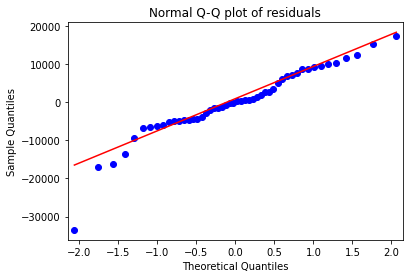

In [16]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

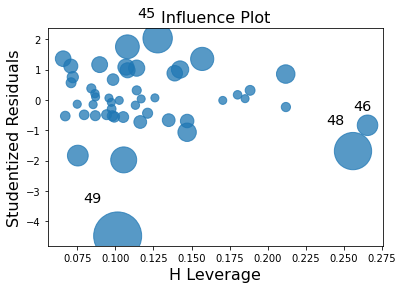

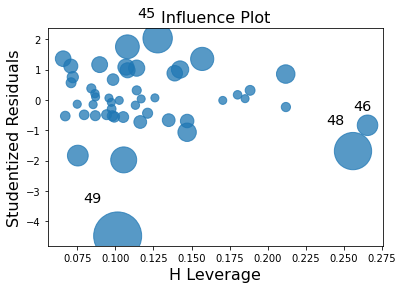

In [17]:
#Detecting Influencers/Outliers
sm.graphics.influence_plot(model)

In [18]:
df1=df.drop(df.index[49],axis=0)
#49th  observation is deleted, now build new model with this data
model1=smf.ols('Profit~rd++Administration+marketing+California+Florida+newyork',data=df).fit()

In [19]:
model1.params

Intercept         37633.233317
rd                    0.806023
Administration       -0.027004
marketing             0.026980
California        12492.110514
Florida           12690.899307
newyork           12450.223495
dtype: float64

In [20]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.34e-27
Time:                        23:19:07   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
rd                 0.8060      0.046     17.369      0.000       0.712       0.900
Administration    -0.0270      0.052     -0.517      0.608      -0.132       0.078
marketing          0.0270      0.017      1.574      0.123      -0.008       0.062
California      1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida         1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
newyork         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     2.40e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
#check outliler
(model1.rsquared,model1.aic)

(0.9507524843355148, 1062.764909597834)

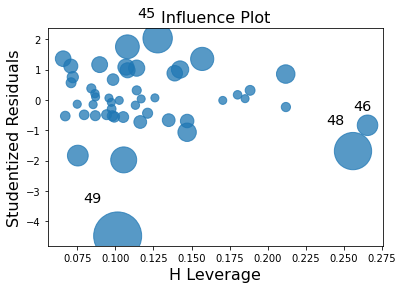

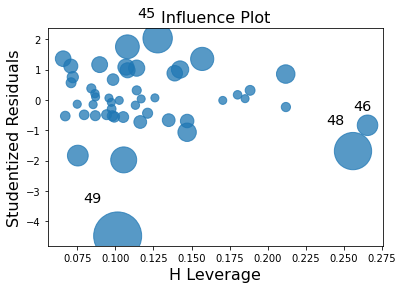

In [22]:
#Detecting Influencers/Outliers
sm.graphics.influence_plot(model1)

In [23]:
#Discard the data points which are influencers 
df2=df.drop(df.index[[49,48,46]],axis=0)

In [24]:
#Again build a model
model2=smf.ols('Profit~rd+marketing+California+Florida+newyork',data=df).fit()

In [25]:
model2.params

Intercept     35249.524615
rd                0.796743
marketing         0.029751
California    11709.420368
Florida       11850.207314
newyork       11689.896933
dtype: float64

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     215.8
Date:                Thu, 13 May 2021   Prob (F-statistic):           9.72e-29
Time:                        23:19:08   Log-Likelihood:                -525.53
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1071.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.525e+04   2100.376     16.782      0.000     3.1e+04    3.95e+04
rd             0.7967      0.042     18.771      0.000       0.711       0.882
marketing      0.0298      0.016      1.842      0.072      -0.003       0.062
California  1.171e+04   1910.312      6.130      0.000    7861.854    1.56e+04
Florida     1.185e+04   2170.903      5.459      0.000    7477.785    1.62e+04
newyork     1.169e+04   1988.428      5.879      0.000    7684.996    1.57e+04
==============================================================================
Omnibus:                       14.640   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.037
Skew:                          -0.938   Prob(JB):                     2.70e-05
Kurtosis:                       5.565   Cond. No.                     5.57e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
#calculate rsquared
(model2.rsquared,model2.aic)

(0.950453304509085, 1061.067741856422)

In [28]:
#predict model2
startup_predict=model2.predict(df2)
startup_predict

0     192716.045225
1     189713.718878
2     181489.428305
3     173367.500227
4     171216.444327
5     162806.718655
6     158012.480024
7     160549.338194
8     152251.473717
9     154298.493451
10    135115.907862
11    134598.641954
12    129317.860381
13    127770.141039
14    150295.043405
15    145973.269034
16    116979.772435
17    130763.575443
18    128974.236897
19    115793.685842
20    116599.095938
21    118313.021192
22    115078.284890
23    109972.832315
24    112505.857457
25    102584.549900
26    111105.527690
27    114898.052901
28    103240.776813
29    102397.538637
30     99204.589241
31     98273.930179
32     98850.554264
33     97699.644041
34     90219.932792
35     89715.027502
36     75921.015547
37     87933.097789
38     68568.946276
39     82886.489100
40     75009.521047
41     74216.313367
42     70197.804086
43     60350.661250
44     65471.871971
45     47792.990538
47     46958.944984
dtype: float64

In [29]:
#check error
startup_error=df2.Profit-startup_predict
startup_error

0      -454.215225
1      2078.341122
2      9560.961695
3      9534.489773
4     -5028.504327
5     -5815.598655
6     -1889.970024
7     -4796.738194
8       -39.703717
9     -4538.533451
10    11006.042138
11     9660.758046
12    12267.659619
13     6537.208961
14   -17692.393405
15   -16056.229034
16    10013.157565
17    -5393.205443
18    -4707.336897
19     6983.174158
20     1874.934062
21    -7000.001192
22    -4726.034890
23    -1238.842315
24    -3953.817457
25     4819.790100
26    -5371.987690
27    -9889.742901
28       41.603187
29    -1392.898637
30      733.000759
31     -790.370179
32    -1422.714264
33     -920.724041
34     6492.867208
35     6764.482498
36    14787.174453
37     2016.042211
38    12660.113724
39    -1880.729100
40     3230.388953
41     3582.516633
42     1300.685914
43     9408.318750
44     -271.541971
45    17133.089462
47    -4399.214984
dtype: float64

In [30]:
#check mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
df_rmse=sqrt(mean_squared_error(df2.Profit,startup_predict))
df_rmse

7467.256229977507